# Python for bioimage analysis

In [1]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "bioio",
#     "bioio-nd2",
#     "bioio-tifffile",
#     "imageio",
#     "matplotlib",
#     "ndv[jupyter,vispy]",
#     "numpy",
#     "rich",
# ]
# ///

format later:
## Description

In this Notebook...
## Objectives

    ...
    ...

## Table of Contents
1. Importing libraries
2. Reading images
3. View images using ndv
4. Images as numpy arrays
5. Visualize images using Matplotlib (functions) 

## 1. Import all necessary libraries

In [2]:
import matplotlib.pyplot as plt
import ndv
import numpy as np
from bioio import BioImage
from matplotlib.patches import Rectangle
from rich import print

## 2. Read images using ```bioio```

### Bioio can read various image file formats
There are many ways of reading image files. 
[bioio](https://github.com/bioio-devs/bioio)
can read images of different file-formats.  
Different fileformats require different [plugins](https://github.com/bioio-devs/bioio) 


We use [bioio-tifffile](https://github.com/bioio-devs/bioio-tifffile) to read tiff files.  

We have already installed bioio-tifffile to this jupyter notebook by using 

`juv add python_for_bioimage_analysis.ipynb bioio-tifffile`

You can find it at the top of the notebook.  

### Example: Read a tif file using bioio
bioio documentation: https://bioio-devs.github.io/bioio/OVERVIEW.html  
Reminder: we imported the relevant packages using 

```python
from bioio import BioImage
import bioio_tifffile
```


bioio loads the image and metadata into a container. We name the container img

In [3]:
img = BioImage(
    "/Users/mariatheiss/Documents/Teaching/Bobiac_teaching_material/intro_to_python/confocal-series.tif"
)

In [4]:
type(img)

bioio.bio_image.BioImage

### Task: try out operations on img
Below are a few examples of operations on img. taken from [here](https://github.com/bioio-devs/bioio).  
Try out a few of the operations  

```python 
## Operations 

# Get a BioImage object
img = BioImage("my_file.tiff")  # selects the first scene found
img.data  # returns 5D TCZYX numpy array
img.xarray_data  # returns 5D TCZYX xarray data array backed by numpy
img.dims  # returns a Dimensions object
img.dims.order  # returns string "TCZYX"
img.dims.X  # returns size of X dimension
img.shape  # returns tuple of dimension sizes in TCZYX order
img.get_image_data("CZYX", T=0)  # returns 4D CZYX numpy array

```

### Solution

In [5]:
img.dims.order

'TCZYX'

In [6]:
img.dims

<Dimensions [T: 1, C: 2, Z: 25, Y: 400, X: 400]>

In [7]:
img.shape

(1, 2, 25, 400, 400)

### Extract a numpy array from the Bioimage object

[numpy documentation](https://numpy.org/doc/stable/)

Reminder: we imported numpy as follows: 
```python
import numpy as np
```

In [8]:
# the image is contained in img.data
stack = img.data

In [9]:
type(stack)  # verify it's a numpy array

numpy.ndarray

In [10]:
stack.dtype

dtype('uint8')

### Inspect dimensions of stack

In [11]:
print(img.dims)  # Reminder:
print(stack.shape)  # only one time-point. This is like a movie with only one frame!

<Dimensions [T: 1, C: 2, Z: 25, Y: 400, X: 400]>

(1, 2, 25, 400, 400)

### Get rid of axes of length one

Let's generate dummy arrays to understand what the axis of size 1 does 

In [12]:
simple_list = [1, 2, 3]
simple_array = np.array(simple_list)  # Turn the list into a numpy array
# simple_array = np.array([0, 1, 2]) #This is equivalent

print(type(simple_array))

<class 'numpy.ndarray'>

In [13]:
print(simple_array)
print(simple_array.shape)

[1 2 3]

(3,)

In [14]:
nested_list = [[1, 2, 3]]  # There's extra brackets!
nested_array = np.array(nested_list)
print(nested_array)
print(nested_array.shape)

[[1 2 3]]

(1, 3)

.squeeze() gets rid of all dimensions of size 1

In [15]:
print(nested_array.squeeze())
print(nested_array.squeeze().shape)

[1 2 3]

(3,)

### Task: apply this to `stack` and print its shape
### Solution: 

In [16]:
stack = stack.squeeze()

In [17]:
stack.shape

(2, 25, 400, 400)

## 3. View images using ndv
ndv documentation: https://pyapp-kit.github.io/ndv/latest/  
Reminder: we imported ndv using 
```python
import ndv
```



In [18]:
ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>

## 4. Images as numpy arrays

### 4.1 Load the image

We apply the same approach as before 

In [20]:
cat_img = BioImage(
    "/Users/mariatheiss/Documents/Teaching/Bobiac_teaching_material/intro_to_python/cateye_nonsquare_ds.tif"
)

In [21]:
cat_img.dims

<Dimensions [T: 1, C: 1, Z: 1, Y: 12, X: 11]>

In [237]:
cat = cat_img.data  # cat is now a numpy array

In [23]:
cat.shape

(1, 1, 1, 12, 11)

In [24]:
cat = cat.squeeze()  # remove empty dimensions

### 4.2 Inspecting numpy arrays

#### Inspecting raw intensity values

Remember, the image is now a numpy array.  
The siplest way of viewing it is just running the cell:  

In [238]:
cat

array([[[[[217, 176, 226, 253, 150, 226, 228, 220, 210, 218, 224],
          [215, 181, 236, 219, 225, 220, 215, 210, 141, 173, 105],
          [199, 140, 231, 222, 228, 238, 218, 194, 195, 197,  34],
          [206, 202, 236, 240, 213, 218, 192, 249, 244, 240,  52],
          [226, 220, 235, 202, 188,  50, 226, 242, 233, 224,  49],
          [238, 247, 208, 179, 234,  91, 181, 227, 237, 140,  45],
          [230, 164, 234, 176, 182, 233, 237, 209, 176,  51, 192],
          [246,  86, 204, 218, 199, 202, 230, 208,  51,  61, 222],
          [251,  34, 150, 201, 198, 223, 157,  57,  56, 239, 101],
          [249, 131, 111,  62,  48,  53,  67, 110, 223, 129, 140],
          [253, 148, 169, 184, 150, 182, 197, 236, 206, 142, 197],
          [253, 175, 202, 222, 253, 251, 234, 185, 165, 144, 164]]]]],
      dtype=uint8)

Or using the print function. 

In [239]:
print(cat)

[[[[[217 176 226 253 150 226 228 220 210 218 224]
    [215 181 236 219 225 220 215 210 141 173 105]
    [199 140 231 222 228 238 218 194 195 197  34]
    [206 202 236 240 213 218 192 249 244 240  52]
    [226 220 235 202 188  50 226 242 233 224  49]
    [238 247 208 179 234  91 181 227 237 140  45]
    [230 164 234 176 182 233 237 209 176  51 192]
    [246  86 204 218 199 202 230 208  51  61 222]
    [251  34 150 201 198 223 157  57  56 239 101]
    [249 131 111  62  48  53  67 110 223 129 140]
    [253 148 169 184 150 182 197 236 206 142 197]
    [253 175 202 222 253 251 234 185 165 144 164]]]]]

### 4.3 Inspecting properties of the image

In [240]:
print(f"Type of the image: {type(cat)}")
print(f"Datatype of the image: {cat.dtype}")
print(f"Shape of the image: {cat.shape}")  # Dimensions of the image
print(f"Minimum pixel value: {cat.min()}")  # Min pixel value
print(f"Maximum pixel value: {cat.max()}")  # Max pixel value
print(f"Mean pixel value: {cat.mean():.2f}")  # Average pixel value

Type of the image: <class 'numpy.ndarray'>

Datatype of the image: uint8

Shape of the image: (1, 1, 1, 12, 11)

Minimum pixel value: 34

Maximum pixel value: 253

Mean pixel value: 184.17

### 4.4 Generate a simple plot of the image

In [28]:
# TODO: first without a function, than explain function
def simpleplot(image: np.ndarray) -> None:  # example of function
    plt.imshow(image, cmap="gray")  # vmax=4)
    plt.colorbar()
    plt.show()

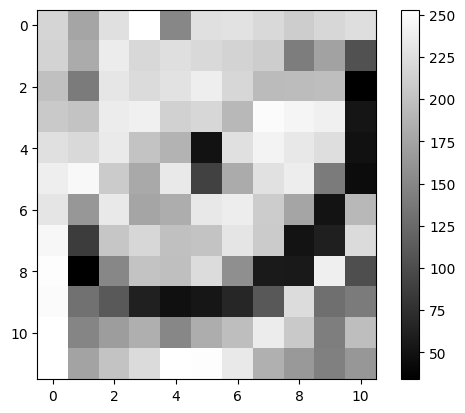

In [29]:
simpleplot(cat)

### 4.5 Plot a simple histogram

In [241]:
print(cat.ravel())  # explain .ravel(). Explain graphically!

[217 176 226 253 150 226 228 220 210 218 224 215 181 236 219 225 220 215
 210 141 173 105 199 140 231 222 228 238 218 194 195 197  34 206 202 236
 240 213 218 192 249 244 240  52 226 220 235 202 188  50 226 242 233 224
  49 238 247 208 179 234  91 181 227 237 140  45 230 164 234 176 182 233
 237 209 176  51 192 246  86 204 218 199 202 230 208  51  61 222 251  34
 150 201 198 223 157  57  56 239 101 249 131 111  62  48  53  67 110 223
 129 140 253 148 169 184 150 182 197 236 206 142 197 253 175 202 222 253
 251 234 185 165 144 164]

Text(0, 0.5, 'count')

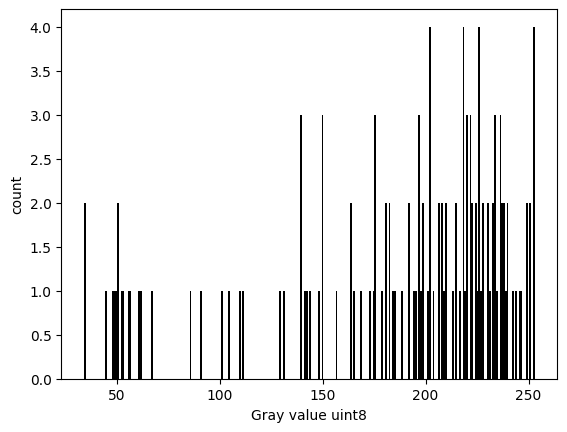

In [242]:
plt.hist(cat.ravel(), bins=256, color="k")
plt.xlabel(f"Gray value {cat.dtype}")  # format string
plt.ylabel("count")

### 4.6 Indexing: individual entries

In [32]:
def valueplot(image: np.ndarray, indices: list | tuple = None) -> None:
    if indices is None:
        indices = [None, None]
    plt.imshow(image, cmap="gray", vmin=np.min(image), vmax=np.max(image))

    # Annotate each pixel with its value
    for i in range(image.shape[0]):  # row
        for j in range(image.shape[1]):  # column
            plt.text(
                j,
                i,
                str(image[i, j]),
                ha="center",
                va="center",
                color="magenta",
                fontsize=10,
            )

    plt.ylabel("row; y; axis = 0")
    plt.xlabel("column; x; axis = 1")

    y, x = indices  # row = y, col = x
    if (
        isinstance(indices, (list, tuple))
        and len(indices) == 2
        and all(isinstance(idx, int) for idx in indices)
    ):
        assert y < image.shape[0], f"value y {y} out of range"
        assert x < image.shape[1], f"value x {x} out of range"

        sign_y = np.sign(y) if y != 0 else 1
        sign_x = np.sign(x) if x != 0 else 1
        y = y % (image.shape[0] - 1)
        x = x % (image.shape[1] - 1)
        rect = Rectangle(
            (x - sign_x * 0.5, y - sign_y * 0.5),
            1,
            1,
            linewidth=2,
            edgecolor="cyan",
            facecolor="none",
        )
        plt.gca().add_patch(rect)

    plt.yticks(list(range(image.shape[0])))
    plt.xticks(list(range(image.shape[1])))
    plt.tight_layout()
    plt.show()

## Task: Explore indexing of individual entries 

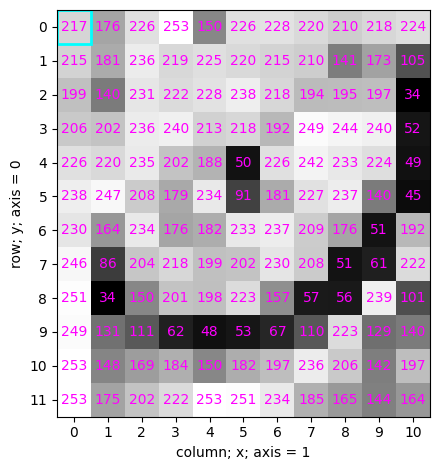

In [33]:
valueplot(cat, [0, 0])

You can simply write 

In [34]:
print(cat[0, 10])

224

Or pass variables instead of numbers if the same numbers are to be reused: 

224

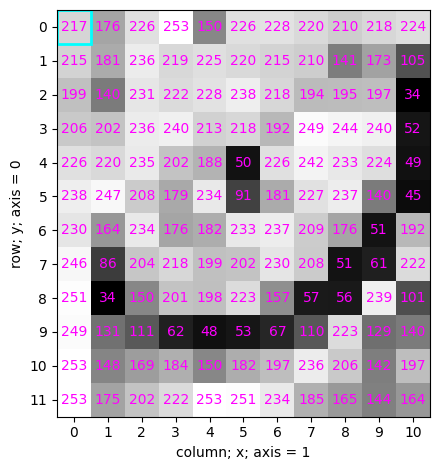

In [35]:
row, col = 0, 10

print(cat[row, col])
valueplot(cat, indices=[row, col])

### 4.7 Indexing rows and columns

### Indexing: rows

In [36]:
row = -1
print(cat[row])  # If only one number is supplied, it applies to axis 0
print(cat[row, :])  # This is equivalent

[253 175 202 222 253 251 234 185 165 144 164]

[253 175 202 222 253 251 234 185 165 144 164]

### Indexing: columns

In [37]:
print(cat[:, 0])

[217 215 199 206 226 238 230 246 251 249 253 253]

### Task 
Print these values

<img align="center" src="https://raw.githubusercontent.com/HMS-IAC/bobiac/main/_static/images/python4bia/python4bia_print_values.png" alt="Print these values" width="300px">


### Solution

In [38]:
# Show them how to query images. Eva introduced that using lists
# Go slower here!
# draw a representation
print(cat[4:6, 5])

[50 91]

### 4.8 Modifying intensity values

### Task: Make a copy of cat, and name it lazercat (new variable). Assign a value of 255 to the indicated pixels

### Pitfall

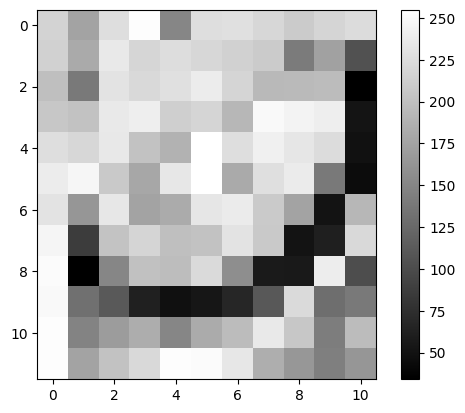

In [39]:
lazercat = cat
lazercat[4:6, 5] = 255
simpleplot(cat)

### Task: Inspect the pixelvalues cat and lazercat

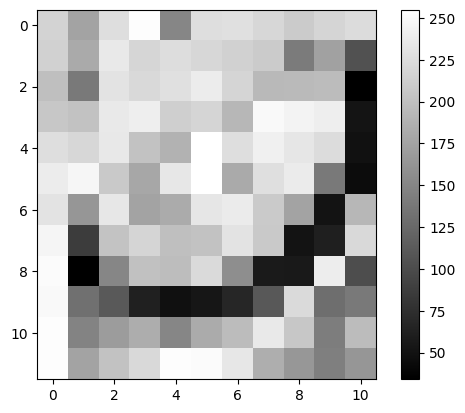

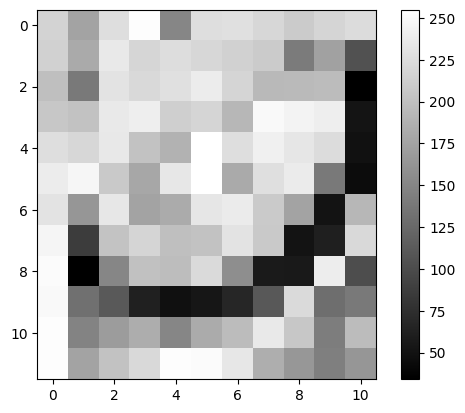

In [40]:
simpleplot(cat)
simpleplot(lazercat)

### Solution

In [41]:
# reload cat in case it was overwritten
cat_img = BioImage(
    "/Users/mariatheiss/Documents/Teaching/Bobiac_teaching_material/intro_to_python/cateye_nonsquare_ds.tif"
)
cat = cat_img.data
cat = cat.squeeze()

In [42]:
lazercat = np.array(cat)
lazercat[4:6, 5] = 255

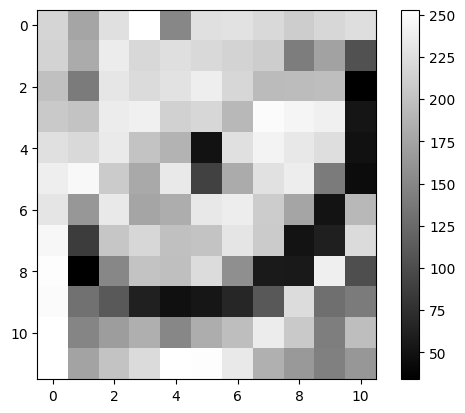

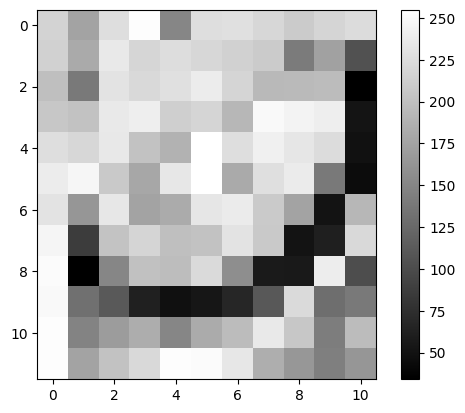

In [43]:
simpleplot(cat)
simpleplot(lazercat)

### Task: Make a copy of cat and name it "pirate". Assign to all pixels but the rim-pixels a value of 0. Plot to verify

### Solution

In [44]:
pirate = np.array(cat)

In [45]:
pirate[1:-1, 1:-1] = 0

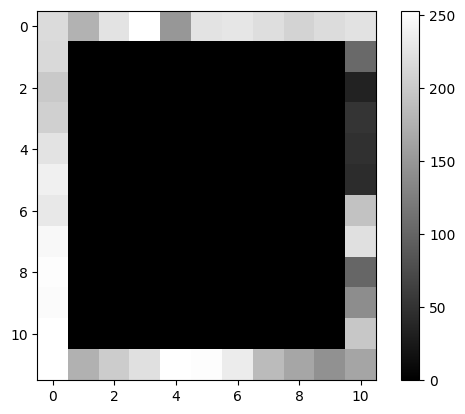

In [46]:
simpleplot(pirate)

### Task: Make a copy of cat and name it "monocle". Assign a value of 0 to the rim pixels. Plot to verify
Tip: you don't need a for-loop for this 

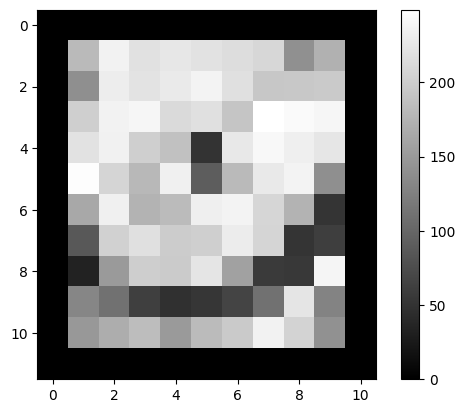

In [47]:
monocle = np.array(cat)
pxvalue = 0
monocle[0, :] = pxvalue
monocle[-1, :] = pxvalue
monocle[:, 0] = pxvalue
monocle[:, -1] = pxvalue

simpleplot(monocle)

### Task: Make a copy of cat and name it "h_tabby". Assign a value of 0 to every other pixel in y to give it a horizontal stripy pattern 

In [48]:
h_tabby = np.array(cat)
ymax = len(cat[0])  # the maximum y value
# for i in range(0, ymax, 2):
#     ...  # fill in the gap

### Solution

In [49]:
h_tabby = np.array(cat)
ymax = cat.shape[0]
for i in range(0, ymax, 2):
    h_tabby[i] = 0

In [50]:
h_tabby[0:ymax:2] = 0
h_tabby[::2] = 0  # This is equivalent

In [51]:
print(cat[::2])

[[217 176 226 253 150 226 228 220 210 218 224]
 [199 140 231 222 228 238 218 194 195 197  34]
 [226 220 235 202 188  50 226 242 233 224  49]
 [230 164 234 176 182 233 237 209 176  51 192]
 [251  34 150 201 198 223 157  57  56 239 101]
 [253 148 169 184 150 182 197 236 206 142 197]]

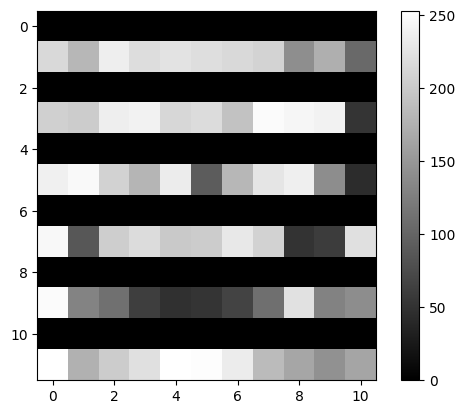

In [52]:
simpleplot(h_tabby)

### Task: Make a copy of cat and name it "v_tabby". Assign a value of 0 to every other pixel in y to give it a vertical stripy pattern 

### Solution

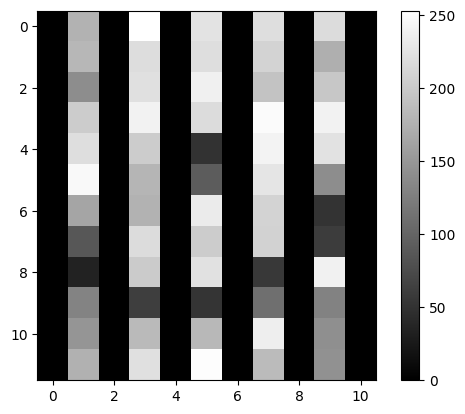

In [53]:
v_tabby = np.array(cat)
v_tabby[:, ::2] = 0
simpleplot(v_tabby)

### 4.3 Numpy and multichannel/z-stacks
A

Use real image! 
Learning goal: 
* handling image axes
* avoiding int overflow, why it's a good idea to use numpy 

#### Reminder: we ran these lines to extract image stack

In [54]:
img = BioImage(
    "/Users/mariatheiss/Documents/Teaching/Bobiac_teaching_material/intro_to_python/confocal-series.tif"
)
stack = img.data
stack = stack.squeeze()

In [80]:
print(img.dims)
print(stack.shape)

<Dimensions [T: 1, C: 2, Z: 25, Y: 400, X: 400]>

(2, 25, 400, 400)

#### Reminder: You can use ndv to inspect the image

In [81]:
ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>

### Task: Save the first channel of stack as ch0, and the second as ch1

### Solution

In [82]:
ch0 = np.array(stack[0])
ch1 = np.array(stack[1])

In [83]:
ch0 = np.array(stack[0])
print(ch0.shape)

(25, 400, 400)

### Task: plot ch0 using function simpleplot()

### Pitfalls: 

In [58]:
# simpleplot(ch0)

### Solution: 
simpleplot can only plot a 2D array. 
You must index ch0 such that it returns a 2D array. Examples: 

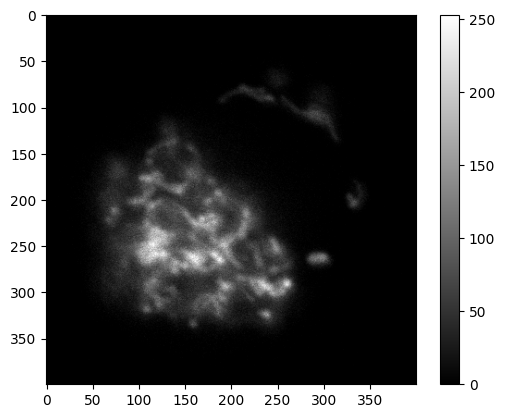

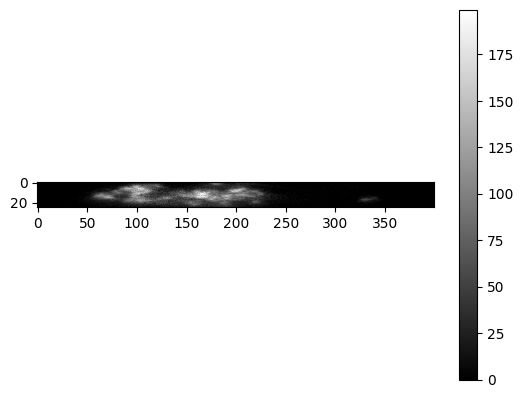

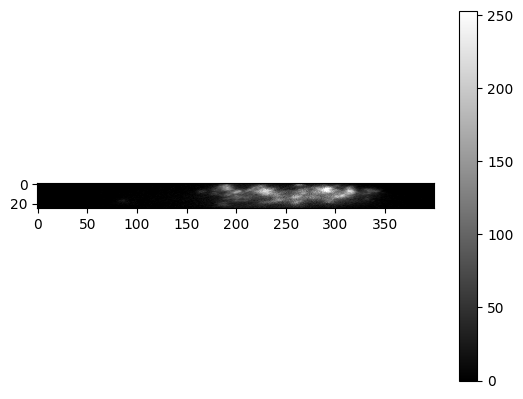

In [59]:
z = 17
y = 200
x = 200
simpleplot(ch0[z])  # show only one z-plane
simpleplot(ch0[:, y])  # show only one y-plane
simpleplot(ch0[:, :, x])  # show only one x-plane

### Task: generate an image that is the mean of all z-planes of ch0. Call it mean_project_ch0
Collapse ch0 into a 2D image by averaging the values along z.   
The result should be a (400, 400) array where each value represents the mean of the all z intensity values at that position.  
This is called the mean projection

Tip: https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy-mean

In [60]:
# mean_project_ch0 = np.mean(...)  # fill in the gaps

# # test your result
# assert mean_project_ch0.shape == (400, 400), (
#     f"Your output shape is {mean_project_ch0.shape}, but should be (400, 400)"
# )
# print(mean_project_ch0.shape)
# simpleplot(mean_project_ch0)

### Solution

(400, 400)

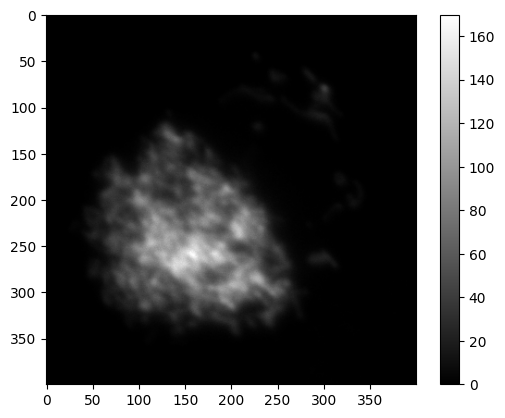

In [86]:
mean_project_ch0 = np.mean(ch0, axis=0)

# test your result
assert mean_project_ch0.shape == (400, 400), (
    f"Your output shape is {mean_project_ch0.shape}, but should be (400, 400)"
)

print(mean_project_ch0.shape)
simpleplot(mean_project_ch0)

### Task: compute the max projection of ch0
Collapse ch0 into a 2D image by only displaying the maximum value along z. 
The result should be a (400, 400) array where each value represents the maximum of the all z intensity values at that position.  
This is called max projection

Tip: https://numpy.org/doc/2.2/reference/generated/numpy.max.html#numpy-max

### Solution:

(400, 400)

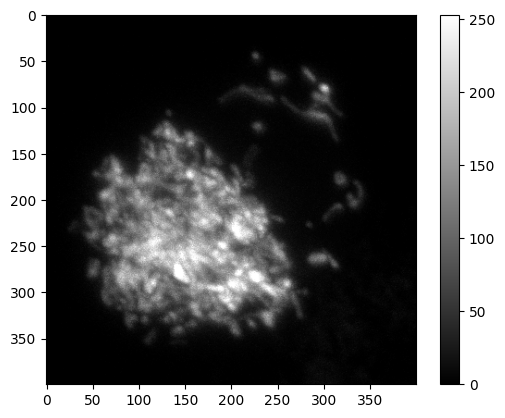

In [88]:
max_project_ch0 = np.max(ch0, axis=0)

# test your result
assert max_project_ch0.shape == (400, 400), (
    f"Your output shape is {max_project_ch0.shape}, but should be (400, 400)"
)

print(max_project_ch0.shape)
simpleplot(max_project_ch0)

### Bonus task: Try other numpy projections

Below are a few operations taken from 
https://numpy.org/doc/2.2/reference/routines.statistics.html 


| Category                 | Function        | What it does along an axis         | Example projection (`axis=0`)                                   |
| ------------------------ | --------------- | ---------------------------------- | --------------------------------------------------------------- |
| **Order statistics**     | `np.percentile` | q-th percentile                    | `p50 = np.percentile(stack, 50, axis=0)` ([numpy.org][1])       |
|                          | `np.quantile`   | q-th quantile (fraction 0-1)       | `q25 = np.quantile(stack, 0.25, axis=0)` ([numpy.org][1])       |
| **Averages & variances** | `np.median`     | Median                             | `med = np.median(stack, axis=0)` ([numpy.org][1])               |
|                          | `np.average`    | Weighted average (pass `weights=`) | `w_avg = np.average(stack, axis=0, weights=w)` ([numpy.org][1]) |
|                          | `np.mean`       | Arithmetic mean                    | `mean = np.mean(stack, axis=0)` ([numpy.org][1])                |
|                          | `np.std`        | Standard deviation                 | `sigma = np.std(stack, axis=0)` ([numpy.org][1])                |
|                          | `np.var`        | Variance                           | `var_map = np.var(stack, axis=0)` ([numpy.org][1])              |

[1]: https://numpy.org/doc/stable/reference/routines.statistics.html "Statistics — NumPy v2.3 Manual"


### 4.4 Generating numpy arrays

There are many reasons to generate numpy arrays 
* You may need it as a basis for further computations
* You want to generate dummy data to test something quickly 

### Create an array of 0s with shape [3, 2, 2]

In [139]:
zeroes = np.zeros([3, 2, 2])
print(zeroes)
zeroes.dtype

[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

dtype('float64')

#### Create an empty array of integers with shape [3, 2, 2]

In [140]:
empty_int = np.empty([3, 2, 2], dtype=int)

#### Assign a value of 1 to [0,0,0]. Assign a value of 2.2 to [0,0,1]

In [141]:
empty_int[0, 0, 0] = 1
empty_int[0, 0, 1] = 2.2

In [149]:
print(empty_int)
print(empty_int.dtype)

[[[1 2]
  [0 0]]

 [[0 0]
  [0 0]]

 [[0 0]
  [0 0]]]

int64

### Generate an array of zeroes that has the same properties as cat

In [145]:
zeroes_cat = np.zeros_like(cat)

In [148]:
print(zeroes_cat)
print(zeroes_cat.dtype)

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]

uint8

## Simulate a multichannel image 
* Call it ```dual_ch_fake```
* Of shape [2,9, 10]
* Same dtype as ```cat```
* Each pixel has a random value between 0 and 256 (exclusive)

Documentation: https://numpy.org/doc/2.0/reference/random/generated/numpy.random.randint.html 

In [170]:
# dual_ch_fake = np.random.randint(...)

### Solution

In [174]:
dual_ch_fake = np.random.randint(0, 256, size=(2, 9, 10), dtype=np.uint8)

Let's plot the two channels:

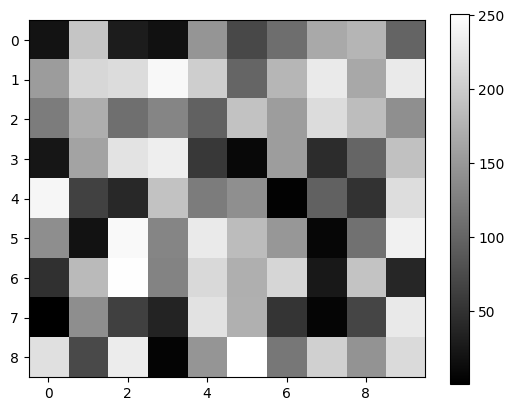

In [175]:
simpleplot(dual_ch_fake[0, :, :])

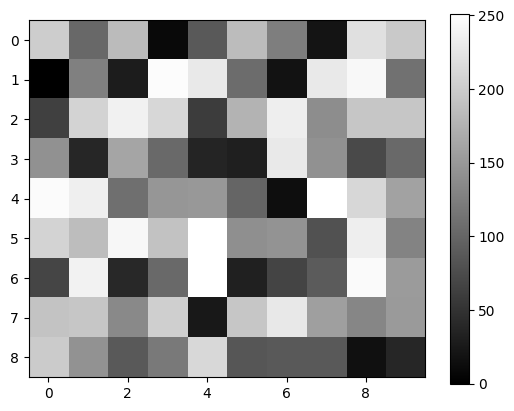

In [176]:
simpleplot(dual_ch_fake[1, :, :])

### Task: sanity-check whether np.mean does what you expect it to do without using numpy 

Reminder: You can calculate a mean image of the two channels like this: 

In [182]:
mean_of_channels = np.mean(dual_ch_fake, axis=0)

And generate an array of each channel like this: 

In [198]:
ch_0 = np.array(dual_ch_fake[0, :, :])
ch_1 = np.array(dual_ch_fake[1, :, :])

### Pitfall

In [201]:
mean_of_channels == (ch_0 + ch_1) / 2  # integer overflow

array([[False, False, False, False, False, False, False, False, False,
        False],
       [ True, False,  True, False, False,  True,  True, False, False,
        False],
       [ True, False, False, False,  True, False, False, False, False,
        False],
       [ True,  True, False, False,  True,  True, False,  True,  True,
        False],
       [False, False,  True, False, False,  True,  True, False, False,
        False],
       [False,  True, False, False, False, False, False,  True, False,
        False],
       [ True, False, False,  True, False,  True, False,  True, False,
         True],
       [ True, False,  True,  True,  True, False, False,  True,  True,
        False],
       [False,  True, False,  True, False, False,  True, False,  True,
         True]])

### Possible solution

In [202]:
mean_manual = dual_ch_fake[0, :, :] / 2 + dual_ch_fake[1, :, :] / 2

In [203]:
mean_of_channels == mean_manual

array([[False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

verify all values are True

In [204]:
np.unique(mean_of_channels == mean_manual)

array([False,  True])

## 5. Visualization

## 5.1. Visualization using Matplotlib

In [72]:
def show_2_channels(image):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))

    for i in range(2):
        im = axes[i].imshow(image[i, :, :], cmap="gray", vmin=0, vmax=255)
        axes[i].imshow(image[i, :, :], cmap="gray", vmin=0, vmax=255)
        axes[i].set_title(f"Channel {i}")
        axes[i].axis("off")
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

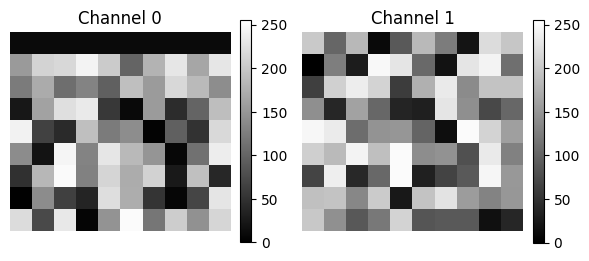

In [207]:
show_2_channels(dual_ch_fake)

In [208]:
# Task: plot all channels of the following image. Write a function show_all_channels().

In [209]:
threechannel = np.random.randint(0, 256, size=(3, 5, 5), dtype=np.uint8)

In [210]:
np.shape(threechannel)[0]

3

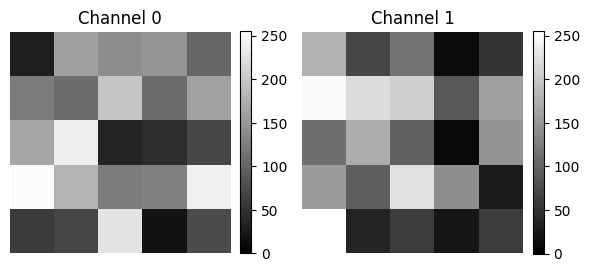

In [211]:
show_2_channels(threechannel)

In [212]:
def show_all_channels(image, n_channels=None):
    if not n_channels:
        nchannels = np.shape(image)[0]
    fig, axes = plt.subplots(1, nchannels, figsize=(6, 3))
    for i in range(nchannels):
        im = axes[i].imshow(
            image[
                i,
                :,
            ],
            cmap="gray",
            vmin=0,
            vmax=255,
        )
        axes[i].imshow(image[i, :, :], cmap="gray", vmin=0, vmax=255)
        axes[i].set_title(f"Channel {i}")
        axes[i].axis("off")
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

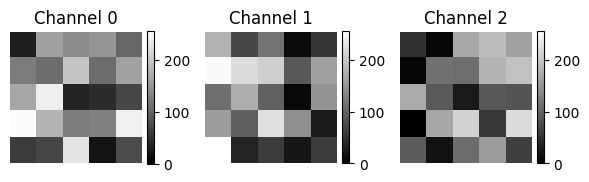

In [213]:
show_all_channels(threechannel)